In [1]:
import scvelo as scv
scv.settings.verbosity = 0
dataset = '../data/Pancreas/endocrinogenesis_day15.h5ad'
label = 'clusters'
exp_metrics = {}

In [2]:
import unitvelo as utv

(Running UniTVelo 0.1.dev1+g1881f6e)
2022-03-27 02:02:45


In [3]:
cluster_edges = [
    ("Pre-endocrine", "Alpha"), 
    ("Pre-endocrine", "Beta"), 
    ("Pre-endocrine", "Delta"), 
    ("Pre-endocrine", "Epsilon")]

## scVelo stochastic

  0%|          | 0.00/50.0M [00:00<?, ?B/s]

2022-03-26 22:55:15.586674: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


  0%|          | 0/3696 [00:00<?, ?cells/s]

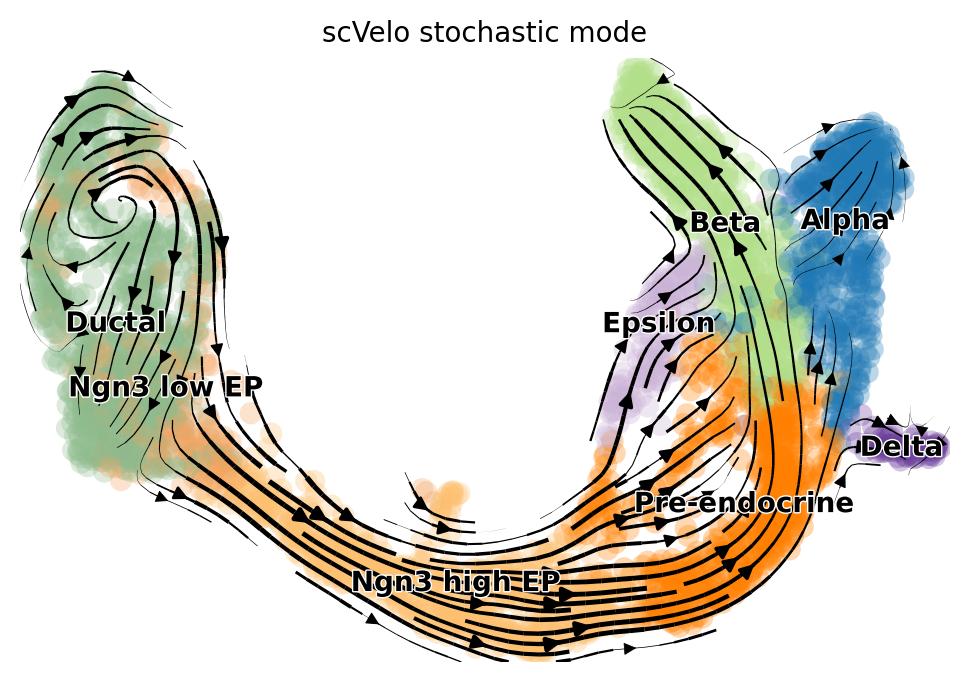

In [3]:
title = 'scVelo stochastic mode'
adata = scv.datasets.pancreas()
adata.uns['datapath'] = dataset
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.velocity(adata, mode='stochastic')

scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color=label, dpi=200, title=title)

In [6]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
exp_metrics["model_dyn"] = utv.evaluate(adata_velo, cluster_edges, label, 'velocity')

# Cross-Boundary Direction Correctness (A->B)
{('Pre-endocrine', 'Alpha'): 0.7365376218432363, ('Pre-endocrine', 'Beta'): 0.8197388097656083, ('Pre-endocrine', 'Delta'): 0.5706277880734462, ('Pre-endocrine', 'Epsilon'): -0.06098601187558073}
Total Mean: 0.5164795519516775
# In-cluster Coherence
{'Alpha': 0.76361513, 'Beta': 0.7229234, 'Delta': 0.7163281, 'Ductal': 0.782643, 'Epsilon': 0.7918435, 'Ngn3 high EP': 0.9023097, 'Ngn3 low EP': 0.7831062, 'Pre-endocrine': 0.83594406}
Total Mean: 0.7873390913009644


## scVelo dynamic

  0%|          | 0/1298 [00:00<?, ?gene/s]

  0%|          | 0/3696 [00:00<?, ?cells/s]

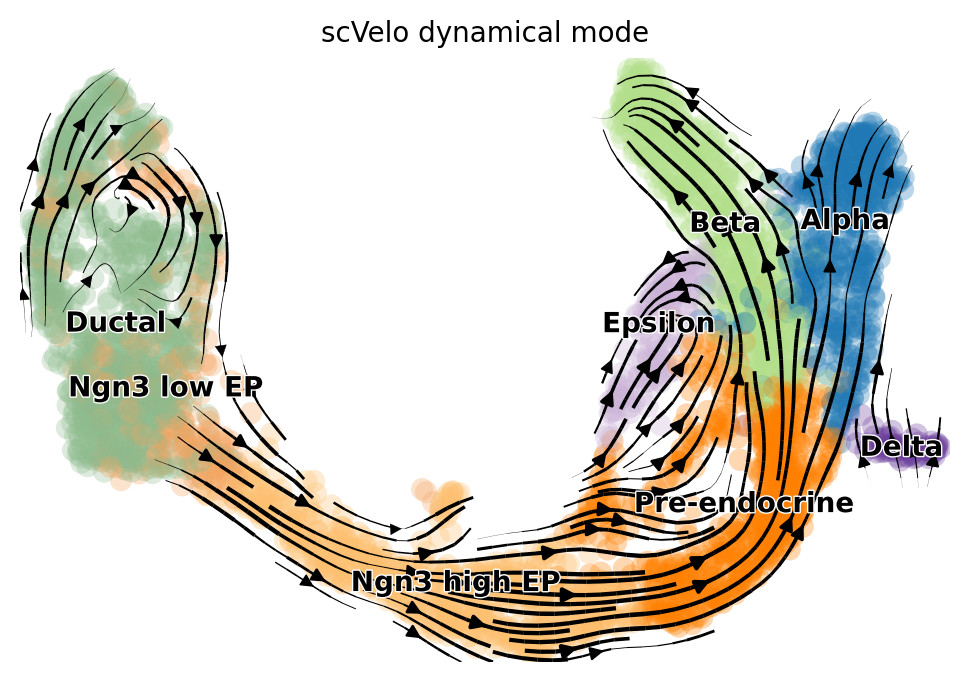

In [4]:
title = 'scVelo dynamical mode'
adata = scv.datasets.pancreas()
adata.uns['datapath'] = dataset
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.recover_dynamics(adata, n_jobs=20)
scv.tl.velocity(adata, mode='dynamical')

scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color=label, dpi=200, title=title)

In [5]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
exp_metrics["model_dyn"] = utv.evaluate(adata_velo, cluster_edges, label, 'velocity')

# Cross-Boundary Direction Correctness (A->B)
{('Pre-endocrine', 'Alpha'): 0.7424931456603442, ('Pre-endocrine', 'Beta'): 0.7806093920612991, ('Pre-endocrine', 'Delta'): 0.26151253544818326, ('Pre-endocrine', 'Epsilon'): 0.06710996614751531}
Total Mean: 0.46293125982933553
# In-cluster Coherence
{'Alpha': 0.8048766725240415, 'Beta': 0.8913162213158601, 'Delta': 0.9405255287342073, 'Ductal': 0.8183728275959199, 'Epsilon': 0.833433288639956, 'Ngn3 high EP': 0.8779571680161455, 'Ngn3 low EP': 0.8290937872987754, 'Pre-endocrine': 0.8993869968401964}
Total Mean: 0.8618703113706377


## UniTVelo

In [6]:
velo_config = utv.config.Configuration()
velo_config.R2_ADJUST = False
velo_config.IROOT = None
velo_config.FIT_OPTION = '2'
velo_config.ASSIGN_POS_U = True

-------> Model Configuration Settings <-------

 GPU: 2	FIG_DIR: ./figures/	BASE_FUNCTION: Gaussian	
 GENERAL: Curve	BASIS: None	N_TOP_GENES: 2000	
 OFFSET_GENES: False	FILTER_CELLS: False	EXAMINE_GENE: False	
 RESCALE_TIME: False	RESCALE_DATA: True	R2_ADJUST: False	
 IROOT: None	NUM_REPEAT: 1	FIT_OPTION: 2	
 DENSITY: Raw	REORDER_CELL: Hard	AGGREGATE_T: False	
 ASSIGN_POS_U: True	WIN_SIZE: 50	LEARNING_RATE: 0.01	
 MAX_ITER: 10000	USE_RAW: False	RAW_GENES: False	

---> # of velocity genes used 1029
---> # of velocity genes used 1029
---> # of velocity genes used 1028


  0%|          | 0/10000 [00:00<?, ?it/s]

 | 558,6656868902,070

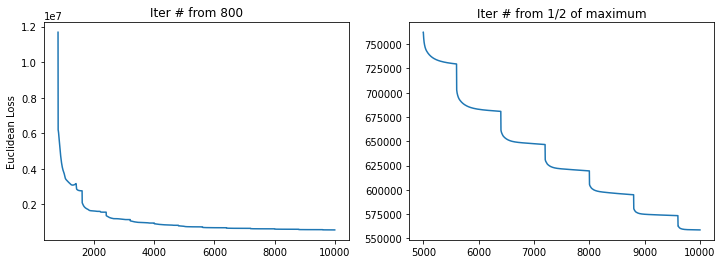

  0%|          | 0/3696 [00:00<?, ?cells/s]

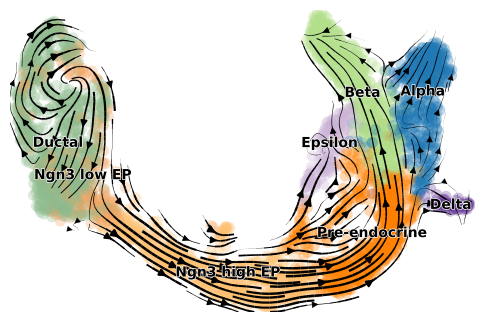

In [7]:
adata = utv.run_model(dataset, label, config_file=velo_config)
scv.pl.velocity_embedding_stream(adata, color=adata.uns['label'], dpi=100, title='')

In [8]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
exp_metrics["model_dyn"] = utv.evaluate(adata_velo, cluster_edges, label, 'velocity')

# Cross-Boundary Direction Correctness (A->B)
{('Pre-endocrine', 'Alpha'): 0.3521216835696168, ('Pre-endocrine', 'Beta'): 0.7386110680461391, ('Pre-endocrine', 'Delta'): 0.4199843742079994, ('Pre-endocrine', 'Epsilon'): 0.4786417877697851}
Total Mean: 0.4973397283983851
# In-cluster Coherence
{'Alpha': 0.6653432269410451, 'Beta': 0.5791944174497988, 'Delta': 0.488151258873794, 'Ductal': 0.5163755809918804, 'Epsilon': 0.6810124266415184, 'Ngn3 high EP': 0.7446276654478519, 'Ngn3 low EP': 0.5561005635862394, 'Pre-endocrine': 0.7614831575366431}
Total Mean: 0.6240360371835963
